# Fibonacci

Fibonacci(0) = 0
Fibonacci(1) = 1
Fibonacci(2) = 1
Fibonacci(3) = 2
Fibonacci(4) = 3
Fibonacci(5) = 5
Fibonacci(6) = 8
Fibonacci(7) = 13
Fibonacci(8) = 21
Fibonacci(9) = 34
Fibonacci(10) = 55
Fibonacci(11) = 89
Fibonacci(12) = 144
Fibonacci(13) = 233
Fibonacci(14) = 377
Fibonacci(15) = 610
Fibonacci(16) = 987
Fibonacci(17) = 1597
Fibonacci(18) = 2584
Fibonacci(19) = 4181
Fibonacci(20) = 6765


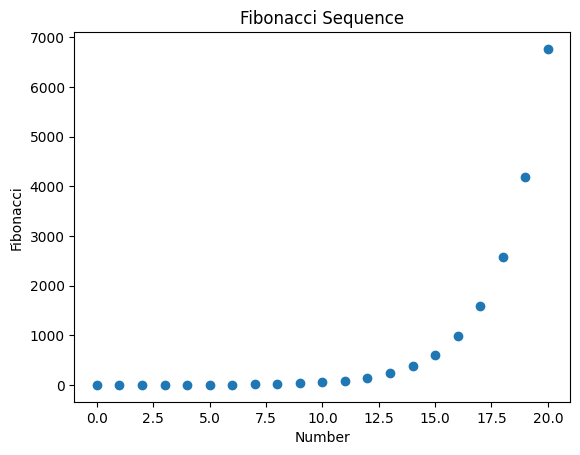

In [3]:
from fibonacci import fibonacci
import time
import matplotlib.pyplot as plt

calculated = {}

def fib(n):
  if n == 0: # base case 1
    return 0
  if n == 1: # base case 2
    return 1
  elif n in calculated:
    return calculated[n]
  else: # recursive step
    calculated[n] = fib(n-1) + fib(n-2)
    return calculated[n]

showNumbers = False
numbers = 20

x = []
y = []

# Calculate and store Fibonacci numbers
for i in range(numbers + 1):
    fib_result = fib(i)
    print(f"Fibonacci({i}) = {fib_result}")
    x.append(i)
    y.append(fib_result)

plt.scatter(x, y)
plt.xlabel("Number")
plt.ylabel("Fibonacci")
plt.title("Fibonacci Sequence")

if showNumbers:
    for i, j in zip(x, y):
        plt.annotate(str(j), (i, j), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

Bottom up vs Top down

In [4]:
#botton up
def fib(n):
  if n == 0:
    return 0
  if n == 1:
    return 1
  # table for tabulation
  table = [None] * (n+1) 
  table[0] = 0        # base case 1, fib(0) = 0
  table[1] = 1        # base case 2, fib(1) = 1
  # filling up tabulation table starting from 2 and going upto n
  for i in range(2,n+1):  
    # we have result of i-1 and i-2 available because these had been evaluated already
    table[i] = table[i-1] + table[i-2]  
  # return the value of n in tabulation table
  return table[n]    

print(fib(100))

354224848179261915075


In [5]:
memo = {} #dictionay for Memoization

def fib(n):
  if n == 0: # base case 1
    return 0
  if n == 1: # base case 2
    return 1
  elif n in memo: # Check if result for n has already been evaluated
    return memo[n] # return the result if it is available
  else: # otherwise recursive step
    memo[n] = fib(n-1) + fib(n-2) # store the result of n in memoization dictionary
    return memo[n] # return the value

print (fib(100))

354224848179261915075


# Knapsack

In [6]:
def solveKnapsack(weights, prices, capacity, index, memo):
  # base case of when we have run out of capacity or objects
  if capacity <= 0 or index >= len(weights): 
    return 0
  # check for solution in memo table
  if (capacity, index) in memo: 
    return memo[(capacity, index)]
  # if weight at index-th position is greater than capacity, skip this object
  if weights[index] > capacity: 
    # store result in memo table
    memo[(capacity, index)] = solveKnapsack(weights, prices, capacity, index + 1, memo) 
    return memo[(capacity, index)] 
  # recursive call, either we can include the index-th object or we cannot, we check both possibilities and return the most optimal one using max
  memo[(capacity, index)] = max(prices[index]+solveKnapsack(weights, prices, capacity - weights[index], index+1, memo),
        solveKnapsack(weights, prices, capacity, index + 1, memo)) 
  return memo[(capacity, index)]

def knapsack(weights, prices, capacity):
  # create a memo dictionary
  memo = {} 
  return solveKnapsack(weights, prices, capacity, 0, memo)

print(knapsack([2,1,1,3], [2,8,1,10], 4))

18


# Coin change

In [8]:
def countways(bills, amount):
  if amount <= 0:
    return 0
  dp = [[1 for _ in range(len(bills))] for _ in range(amount + 1)]
  for amt in range(1, amount+1):
    for j in range(len(bills)):
      bill = bills[j]
      if amt - bill >= 0:
        x = dp[amt - bill][j]
      else:
        x = 0
      if j >= 1:
        y = dp[amt][j-1]
      else:
        y = 0
      dp[amt][j] = x + y
  return dp[amount][len(bills) - 1]

print(countways([1,2,5], 5))

4


# longest inc seq

In [13]:
def longest_increasing_subsequence(nums):
    n = len(nums)
    # Initialize an array to store the lengths of increasing subsequences
    lengths = [1] * n

    # Compute the lengths of increasing subsequences
    for i in range(1, n):
        for j in range(i):
            if nums[i] > nums[j]:
                lengths[i] = max(lengths[i], lengths[j] + 1)

    # Find the maximum length
    max_length = max(lengths)

    # Find the subsequence with the maximum length
    subsequence = []
    curr_length = max_length
    for i in range(n - 1, -1, -1):
        if lengths[i] == curr_length:
            subsequence.append(nums[i])
            curr_length -= 1
            if curr_length == 0:
                break

    subsequence.reverse()

    return max_length, subsequence

nums = [10, 22, 9, 33, 21, 50, 41, 60]
length, subsequence = longest_increasing_subsequence(nums)
print("Length:", length)
print("Subsequence:", subsequence)

Length: 5
Subsequence: [10, 22, 33, 41, 60]


# N ways stairs

In [15]:
def count_ways(n):
    # Initialize the base cases for n = 0 and n = 1
    if n <= 2:
        return 1

    # Initialize an array to store the number of ways to reach each stair
    ways = [0] * (n + 1)

    # Set the base cases
    ways[0] = 1
    ways[1] = 1

    # Compute the number of ways for each stair
    for i in range(2, n + 1):
        ways[i] = ways[i - 1] + ways[i - 2]

    return ways[n]

n = 4
ways = count_ways(n)
print("Number of ways to reach", n, "stairs:", ways)

Number of ways to reach 4 stairs: 5


# N combs

In [16]:
def combination_sum(nums, target):
    # Initialize an array to store the number of combinations for each target sum
    combinations = [0] * (target + 1)

    # There is one way to make a sum of 0, which is by not choosing any number
    combinations[0] = 1

    # Compute the number of combinations for each target sum
    for i in range(1, target + 1):
        for num in nums:
            if i >= num:
                combinations[i] += combinations[i - num]

    return combinations[target]


nums = [1, 2, 3]
target = 4
num_combinations = combination_sum(nums, target)
print("Number of combinations:", num_combinations)

Number of combinations: 7


# HR 1

In [17]:
def rob(nums):
    n = len(nums)
    if n == 0:
        return 0
    if n == 1:
        return nums[0]

    # Initialize an array to store the maximum stolen value for each house
    dp = [0] * n

    # Set the base cases for the first two houses
    dp[0] = nums[0]
    dp[1] = max(nums[0], nums[1])

    # Compute the maximum stolen value for each house
    for i in range(2, n):
        dp[i] = max(dp[i - 1], dp[i - 2] + nums[i])

    return dp[-1]

nums = [1, 2, 3, 1]
max_money = rob(nums)
print("Maximum amount of money:", max_money)

Maximum amount of money: 4


# HR2

In [18]:
def rob(nums):
    def rob_helper(nums):
        n = len(nums)
        if n == 0:
            return 0
        if n == 1:
            return nums[0]

        # Initialize an array to store the maximum stolen value for each house
        dp = [0] * n

        # Set the base cases for the first two houses
        dp[0] = nums[0]
        dp[1] = max(nums[0], nums[1])

        # Compute the maximum stolen value for each house
        for i in range(2, n):
            dp[i] = max(dp[i - 1], dp[i - 2] + nums[i])

        return dp[-1]

    if len(nums) == 0:
        return 0
    if len(nums) == 1:
        return nums[0]

    # Calculate the maximum amount when considering the first house
    max_amount1 = rob_helper(nums[:-1])

    # Calculate the maximum amount when considering the last house
    max_amount2 = rob_helper(nums[1:])

    # Return the maximum of the two amounts
    return max(max_amount1, max_amount2)

nums = [2, 3, 2]
max_money = rob(nums)
print("Maximum amount of money:", max_money)

Maximum amount of money: 3


# Decode ways

In [19]:
def numDecodings(s):
    n = len(s)

    # Base case: an empty string has one decoding
    dp = [0] * (n + 1)
    dp[0] = 1

    # A string of length 1 can be decoded if it is not '0'
    dp[1] = 1 if s[0] != '0' else 0

    # Compute the number of decodings for the remaining characters
    for i in range(2, n + 1):
        # Check if single digit can be decoded
        if s[i - 1] != '0':
            dp[i] += dp[i - 1]

        # Check if two digits can be decoded
        two_digit = int(s[i - 2:i])
        if 10 <= two_digit <= 26:
            dp[i] += dp[i - 2]

    return dp[n]

s = "226"
num_decodings = numDecodings(s)
print("Number of decodings:", num_decodings)

Number of decodings: 3


# Unique ways

In [20]:
def uniquePaths(m, n):
    # Create a 2D grid to store the number of unique paths
    dp = [[0] * n for _ in range(m)]

    # There is only one way to reach any cell in the first row or first column
    for i in range(m):
        dp[i][0] = 1
    for j in range(n):
        dp[0][j] = 1

    # Compute the number of unique paths for each cell
    for i in range(1, m):
        for j in range(1, n):
            dp[i][j] = dp[i - 1][j] + dp[i][j - 1]

    return dp[m - 1][n - 1]


m = 3
n = 7
num_paths = uniquePaths(m, n)
print("Number of unique paths:", num_paths)

Number of unique paths: 28


# Jump game

In [21]:
def canJump(nums):
    n = len(nums)

    # Initialize a boolean array to store whether each index is reachable
    dp = [False] * n

    # The last index is always reachable
    dp[n - 1] = True

    # Starting from the second-to-last index, determine if each index is reachable
    for i in range(n - 2, -1, -1):
        furthest_jump = min(i + nums[i], n - 1)
        for j in range(i + 1, furthest_jump + 1):
            if dp[j]:
                dp[i] = True
                break

    return dp[0]


nums = [2, 3, 1, 1, 4]
can_reach_end = canJump(nums)
print("Can reach the end:", can_reach_end)

Can reach the end: True


# Word break

In [22]:
def wordBreak(s, wordDict):
    n = len(s)

    # Create a boolean array to store whether each prefix of s can be segmented
    dp = [False] * (n + 1)
    dp[0] = True

    # Iterate through each index in s
    for i in range(1, n + 1):
        # Check if any prefix of s can be segmented
        for j in range(i):
            if dp[j] and s[j:i] in wordDict:
                dp[i] = True
                break

    return dp[n]

s = "leetcode"
wordDict = ["leet", "code"]
can_segment = wordBreak(s, wordDict)
print("Can segment the string:", can_segment)

Can segment the string: True
